#B Sprint10 assignment Deep Learning Scratch Neural Networks

https://github.com/DiveintoCode-corp/worksample/blob/master/ml_sprint10.md

English version: https://diver.diveintocode.jp/curriculums/1876

This is an assignment that takes two days to solve in the classroom during the second month of the course. This is the students' first exposure to neural networks. After linear regression, logistic regression, SVM, decision trees, and K-means, this is the sixth scratch assignment, so the students are already familiar with the basic aspects of supervised learning. The next task is "Sprint 11: Deep Learning Scratch Deep Neural Networks", where we will extend the neural network class created here.

#The purpose of this Sprint
* This sprint is focusing on the understanding of the evolutionary content of neural networks from scratch
* Know how to handle image data

##**Understanding Key Terms**
###Deep learning
* Deep learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised.

###Deep Learning Neural Network

The neural network needs to learn all the time to solve tasks in a more qualified manner or even to use various methods to provide a better result. When it gets new information in the system, it learns how to act accordingly to a new situation.

Learning becomes deeper when tasks you solve get harder. Deep neural network represents the type of machine learning when the system uses many layers of nodes to derive high-level functions from input information. It means transforming the data into a more creative and abstract component.

In order to understand the result of deep learning better, let's imagine a picture of an average man. Although you have never seen this picture and his face and body before, you will always identify that it is a human and differentiate it from other creatures. This is an example of how the deep neural network works. Creative and analytical components of information are analyzed and grouped to ensure that the object is identified correctly. These components are not brought to the system directly, thus the ML system has to modify and derive them. 

##Perception
**What is a perceptron in a neural network?**

* In the context of neural networks, a perceptron is an artificial neuron using the Heaviside step function as the activation function. The perceptron algorithm is also termed the single-layer perceptron, to distinguish it from a multilayer perceptron, which is a misnomer for a more complicated neural network.
* In this sprint we are going to introduce preceptrons (single layered precptrons and multi layered preceptrons) this is becaused they are the most basic nural network architecture. Primarily, the most signifant to learn, this is because it is the foundation of all other neural network architectures.

###Perceptrons representation
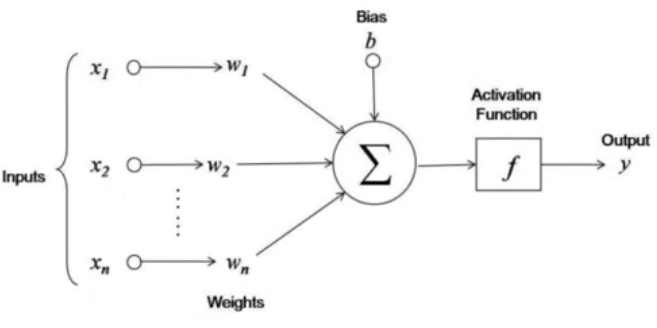

* **x1, x2,..., xn** - these are described to be the features of the data we feed in the perceptrons
* **w1, w2,..., wn** - these are described to be the coefficients associated to these features. In precise terms machine learning / deep learning is mostly focusing on finding the right coefficients for a perfect predictions (training)
* **b** - this is described to be the bias, but in the mean time we can easily regard it as another coefficient similar to **wn** which helps the model to learn. For the purpose of this session, let me choose to se it at zero.
* **epsilon** - this is the function that sums the products between the **xs** and the **ws**. **E = x1*w1 + x2*w2 ... + xn*wn + b**
* The activation function *f* is something we will come back to and addressed precisely later but in the mean time i want you to see it as a tool that helps the model better fit the data by adding non-linearity. One of the properties of the activation function is it is always non-linear. 
* The output *y* is considered to be the result of all the calculations *y = f(E)*

##Activation Functions
* Basically in Neural networks, before we move further with the discussion we have to take note of one more step which is the *Activation function*, this is often called **g**

It's been clear that if we don't consider the activation function, then the value of epsilon **E** would have no boundaries: i.e. it could go up to infinity.

However, though thisis less intuitive, but the activaton function add non-linearity to the algorithm and without the activation function, only linearly separable problems can be solved.

**Reminder** - If you can reflect on what linearly separable problem is.

**Understand that purpose of activation function is to introduce non-linearities into the network**
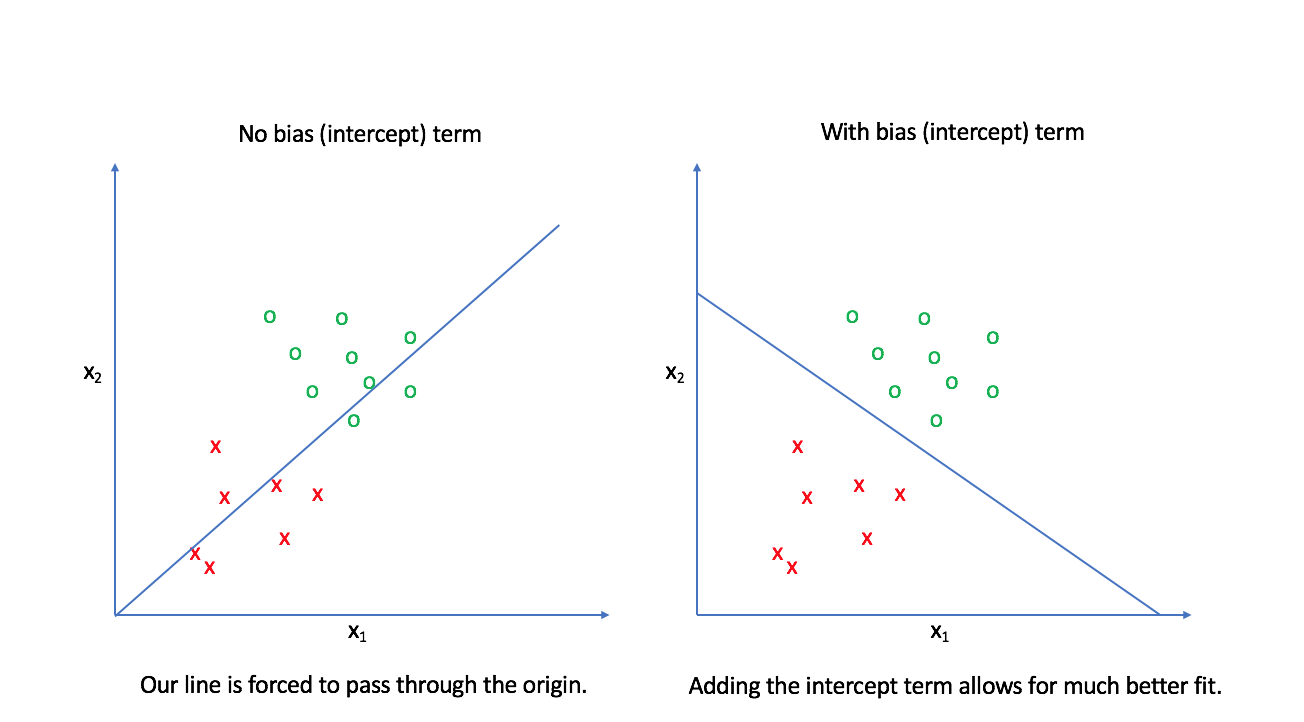

###Now let's see some very common activation functions
* **Sigmoid** - This is a historic activation function, but not the most efficient in generl, now used mainly in the last layer of a binary classification. The formular is the following:

  $sigmoid(x)=1/1 + e^{-x}$


* **Hyperbolic tangent (or tanh)** - this quite similar to sigmoid function. The shape is close tot he one of sigmoid, but ranges between -1 and 1, while sigmoid ranges between 0 and 1. This is as a symetry that sigmoid does not. This is not the most frequently used activation function at first approach anymore. The formula of tanh is the folowing:

  $tanh(x) = e^x - e^{-x} / e^x + e^{-x}$

* **Rectified linear unit (or relu)** - this is tipically different to sigmoid and tanh activation as each, though it looks odd at first sight, but it has the advantage of avoiding the problem of vanashing gradient. It is currently one of the most widly used activation function. the formular is the following:

  $relu(x) = max(0,x)$

###Now see an example of how those functions looks like

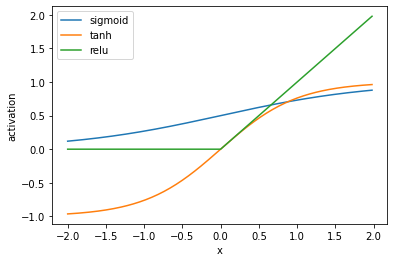

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-2, 2, 0.02)

sigmoid = 1./(1 + np.exp(-x))
tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
relu = np.max([np.zeros(len(x)),x],axis=0)

plt.plot(x, sigmoid)
plt.plot(x, tanh)
plt.plot(x, relu)

plt.xlabel("x")
plt.ylabel("activation")
plt.legend(["sigmoid","tanh", "relu"])

plt.show()

Now, I can see that some of you might be lost but don't worry you will catch up as we move along. By the way if are able to catch up congrtulations. With no disrespect, this is basically the most difficult thing to grab when it comes to neural networks topology. Actually the preceptron is nothing but just a simple unit of a network. This means that a neural is just a stack of layers of preceptrons and this is why they are called **Multi-layered Preceptron (MLP)**. Don't worry we'll talk more about it in a second.

We cannot move further without learning how to build a simple preceptron with sigmoid activation in TensorFlow 2.

If you ready, let's dig in...

##Multi Layered Preceptrons
You have to understand that neural networks are often represented on diagrams using a standard convention:
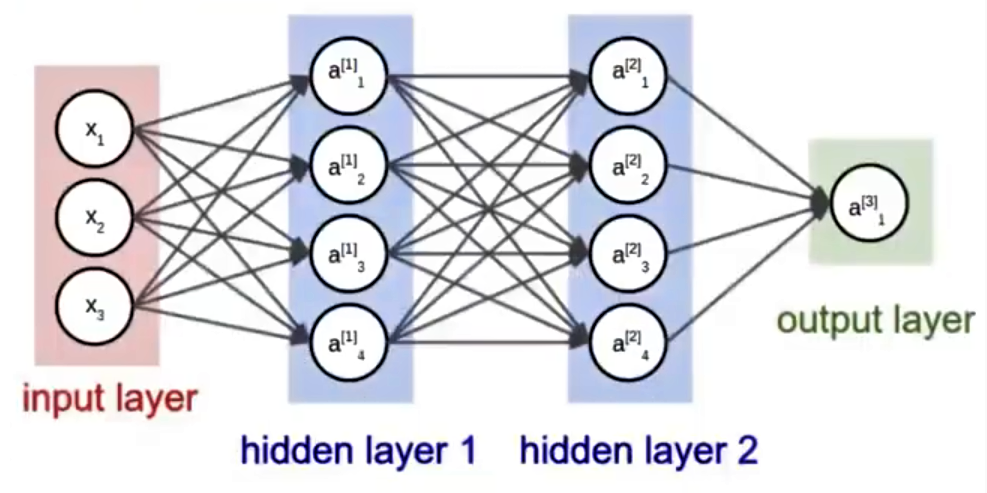

It must be noted that the diagram above has be the read from left to right 

On the left, showed in red, is the input layer: this is actually the input features X = (x_1, x_2, x_3) (e.g. number of rooms in a house for an instance, presence of a garden...). The number of **units** is the number of inputs features. 

ON the right, showed in green, is the **output layer**: this is the prediction of target value (e.g. the house price in a regression, or the class in classification). The number of units depends on the task (for regression, it is usually one, for multiclass classification it is the number of classes)

There is always one and only one input layer and output layer.

In the middle, stated in blue, are the hidden layers. These can be arbitary number of hidden layers. The hiddens layers also have an arbitrary number of units. 

For instance, assuming we change a little bit of the code of our preceptron to turn into a multi layred precptron (MLP)

##The Feed Forward Algorithm (FFA)
After we have learnt about the representation of perceptron and a multi layered perceptron, I would also like to let you understand how to comput predicted value, given input features $X = (x_1, x_2,..., x_N).

To be able to compute the output predicted value, we need to weights $W$ of each unit.

Each unit *i* of a layer *l* (expect the input layer) has associated weights $W_i^{[I]}$. We will use those weights to compute the activation $a_i^{[I]}$ of each unit.

By considering our example in diaram, we could compute the activations of the hidden layer using the following formulas:

  $a_1^{[1]} = g(W_1^{[1]} × X + b_1^{[1]})$

  $a_2^{[1]} = g(W_2^{[1]} × X + b_2^{[1]})$

  $a_3^{[1]} = g(W_3^{[1]} × X + b_3^{[1]})$

  $a_4^{[1]} = g(W_4^{[1]} × X + b_4^{[1]})$

Where $bi^{[I]}$ is called the bias, it is just an additional parameter, and $g$ is the activation function

Now if we want to compute the activations of the second hidden layer $a_i^{[2]}$, we would use the exact same formulars, but with the activations of the first hidden layer as input $(a_i^{[2]}$), instead of the input features:

  $a_1^{[2]} = g(W_1^{[2]} × X + b_1^{[2]})$

  $a_2^{[2]} = g(W_2^{[2]} × X + b_2^{[2]})$

  $a_3^{[2]} = g(W_3^{[2]} × X + b_3^{[2]})$

  $a_4^{[2]} = g(W_4^{[2]} × X + b_4^{[2]})$

  Finally, to compute the output layer that would be exactly the same:

  $a_1^{[3]} = g(W_1^{[3]} × X + b_1^{[3]})$

Hence, in summary, the forward propagation is not so complicated, this is just multiplications and additions.

## **Output errors and Error functions**

We cannot calculate the perfect weights for a neural network, this is because there are too many unknowns. Insteah, the problem of learning is cast as a search or optimization problem and an algorithm is used to navigate the space of possible sets of weights the model may usse in order to make good or excellent predictions.

Typically, a neural network model is trained using the stochastic gradint descent optimization algorithm and weights are updated using the backpropagation of error algorithm.

The $"gradient"$ in gradient desent refers to an error gradient. The model with a given set of weights is used to make predictions and the error for those predictions will then be calculated.

The gradient desent algorithm seekd to change the weights so that the next evaluation reduces the error, meaning the optimization alrogithm is navigating down the gradient (or slope) of error.

Now that we know that trainging neural nets solves an optimization problem, we can look at how the error of a given set of weights is calculated.

### **What is a loss Function and Loss?
In the context of an optimization algorithm, the function used to evaluate a candidate solution (i.e. a set weights) is referred to as the objective function.

We may seek to maximize or minimize the the objective function, meaning that we are searching for a candidate solution that has the heighest or lowest score repectively.

Typically, with neural networks, we seek to minimize the error. As such, the objective function is often referred to as a cost function or a loss function and the value calculate by the loss function is referred to as simply "loss."

The cost or loss function has an important job in that it must faithfully distill all aspect of the model into a single number is such a way that improvements in that number are a sign of a better model.

In calculating the error of the model during the optimization process, a loss function must be choosen.

This can be a challenging problem as the function must capture the properties of the problem and be motivated by concerns that are important to the project and stakeholders. 

Now that we are familiar with the loss function and loss, we need to know what function to use.

### **Maximum Likelihood***

There are many functions that could be used to estimate the error of a set of weights in a neural network

We prefer a function where the space of a candidate solutions maps on to a smooth (but high-dimensional) landscape that the optimizatoin algorithm can reasonably navigate via iterative updates to the model weights

Maximum likelihood estimation, or **MLE**, is a framework for inference for finding the best statistical estimates of parameters from historical traning data which is exactly what we  are trying to do with the neural network.

We have a training dataset with one or more input variables and we are require a model to estimate model weights parameters that best map examples of the inputs to the output or target variable.

Given input,the model is trying to make predictions that match the data distribution of the target variable. Under maximum likelihood,a loss function estimates how closely the distribution of predictions made by a model matches the dstribution of target variables in the training data.

A benefit of using maximum likelihood as a framework for estimating the model parameters (weights) for neural networks and in machine learningin general is that as the number of examples in the training dataset is increased, the estimate of the model parameters improves. This is called the property of "consistency."

Now that we are familiar with the general approach of maximum likelihood, we can look at the error function.

### **Maximum Likelihood and Cross-Entropy**
Under the framework maximum likelihood, the error between two probability distributions is measured using cross-entropy.

When modeling a classification problem where we are interested in mapping input variables to a class label, we can model the problem as predicting the probability of an example belonging to each class. In a binary classification problem, there would be tvk classes, so we may predict the probability of the example belonging to the first class. In the case of multiple-class classification, we can predict a probability for the example belonging to each of the classes. 

In the training dataset, the probability of an example belonging to a given class would be 1 or 0, as each sample in the training dataset is a known example from the domain. We know the answer. 

Therefore, under maximum likelihood estimation, we would seek a set of model weights that minimize the difference between the model's predicted probability distribution given the dataset and the distribution of probabilities in the training dataset. This is called the cross-entropy. 

Technically, cross-entropy comes from the field of information theory and has the unit of "bits.* It is used to estimate the difference between an estimated and predicted probability distributions. 

In the case of regression problems where a quantity is predicted, it is common to use the mean squared error (MSE) loss function instead. 

Nevertheless, under the framework of maximum likelihood estimation and assuming a Gaussian distribution for the target variable, mean squared error can be considered the cross-entropy between the distribution of the model predictions and the distribution of the target variable. 

Therefore, when using the framework of maximum likelihood estimation, we will implement a cross-entropy loss function, which often in practice means a cross-entropy loss function for classification problems and a mean squared error loss function for regression problems. 

Almost universally, deep learning neural networks are trained under the framework of maximum likelihood using cross-entropy as the loss function. 

In fact, adopting this framework may be considered a milestone in deep learning, as before being fully formalized, it was sometimes common for neural networks for classification to use a mean squared error loss function.

The maximum likelihood approach was adopted almost universally not just because of the theoretical framework, but primarily because of the results it produces. Specificially, neural networks for classification that use a sigmoid or softmax activation function in the output layer learn faster and more robustly using a cross-entropy loss function.

### **What Loss Function to Use?**
We can summarize the previous section and directly suggest the loss functions that you should use under a framework of maximum likelihood. 

Importantly, the choice of loss function is directly related to the activation function used in the output layer of your neural network. These two design elements are connected. 

Think of the configuration of the output layer as a choice about the framing of your prediction problem, and the choice of the loss function as the way to calculate the error for a given framing of your problem. 

We will review best practice or default values for each problem type with regard to the output layer and loss function. 

* Regression Problem A problem where you predict a real-value quantity. 
  * Output Layer Configuration: One node with a linear activation unit. 
  * Loss Function: Mean Squared Error (MSE). 
* Binary Classification Problem A problem where you classify an example as belonging to one of two classes. The problem is framed as predicting the likelihood of an example belonging to class one, e.g. the class that you assign the integer value 1, whereas the other class is assigned the value 0. 
  * Output Layer Configuration: One node with a sigmoid activation unit. 
  * Loss Function: Cross-Entropy, also referred to as Logarithmic loss. 
* Multi-Class Classification Problem A problem where you classify an example as belonging to one of more than two classes. The problem is framed as predicting the likelihood of an example belonging to each class. 
  * Output Layer Configuration: One node for each class using the softmax activation function. 
  * Loss Function: Cross-Entropy, also referred to as Logarithmic loss. 

## **Backpropagation and Gradient Decent Algorithms**

Backpropagation and Gradient Decent are one of the tolls used to train neural networks. The training progress allows to let the neural network adjust it's weights **$Ws$** based on the errors made after each iteration. Gradient Decent Allows to measure the rate of the error made and backpropagation allows to propagate that error through the network but from the beginning, that's why it is called backpropagation.

### Gradient Secent
This method is the key to minimizing the loss function and achieving our target, which is to predict close to the original value

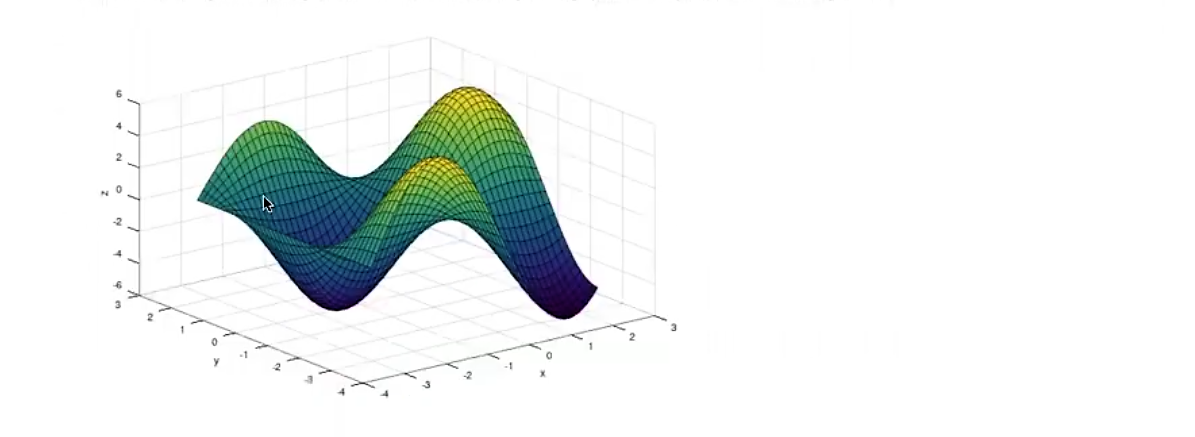

In this diagram, above we see our loss function graph. If we observe we will see it is basically a parabolic shape or a convex shape, it has a specific global minimum which we need to find in order to find the minimum loss function value. 

So, we always try to use a loss function which is convex in shape in order to get a proper minimum. 

Now, we see the predicted results depend on the weights from the feed forward formula. 

Initially, the model assigns random weights to the features. So, say it initializes the **weight=a**. 

So, we can see it generates a ;toss which is far from the minimum point **L-min.** 

Now, we can see that if we move the weights more towards the positive $x-axis$ we can optimize the loss function and achieve minimum value. 

But, how will the machine know? We need to optimize weight to minimize error, so, obviously, we need to check how the error varies with the weights. 

To do this we need to find the derivative of the Error with respect to the weight. **This derivative is called Gradient.** 

**$Gradient = dEldw$**

Where **$E$** is the error and w is the weight. Let's see how this works. 

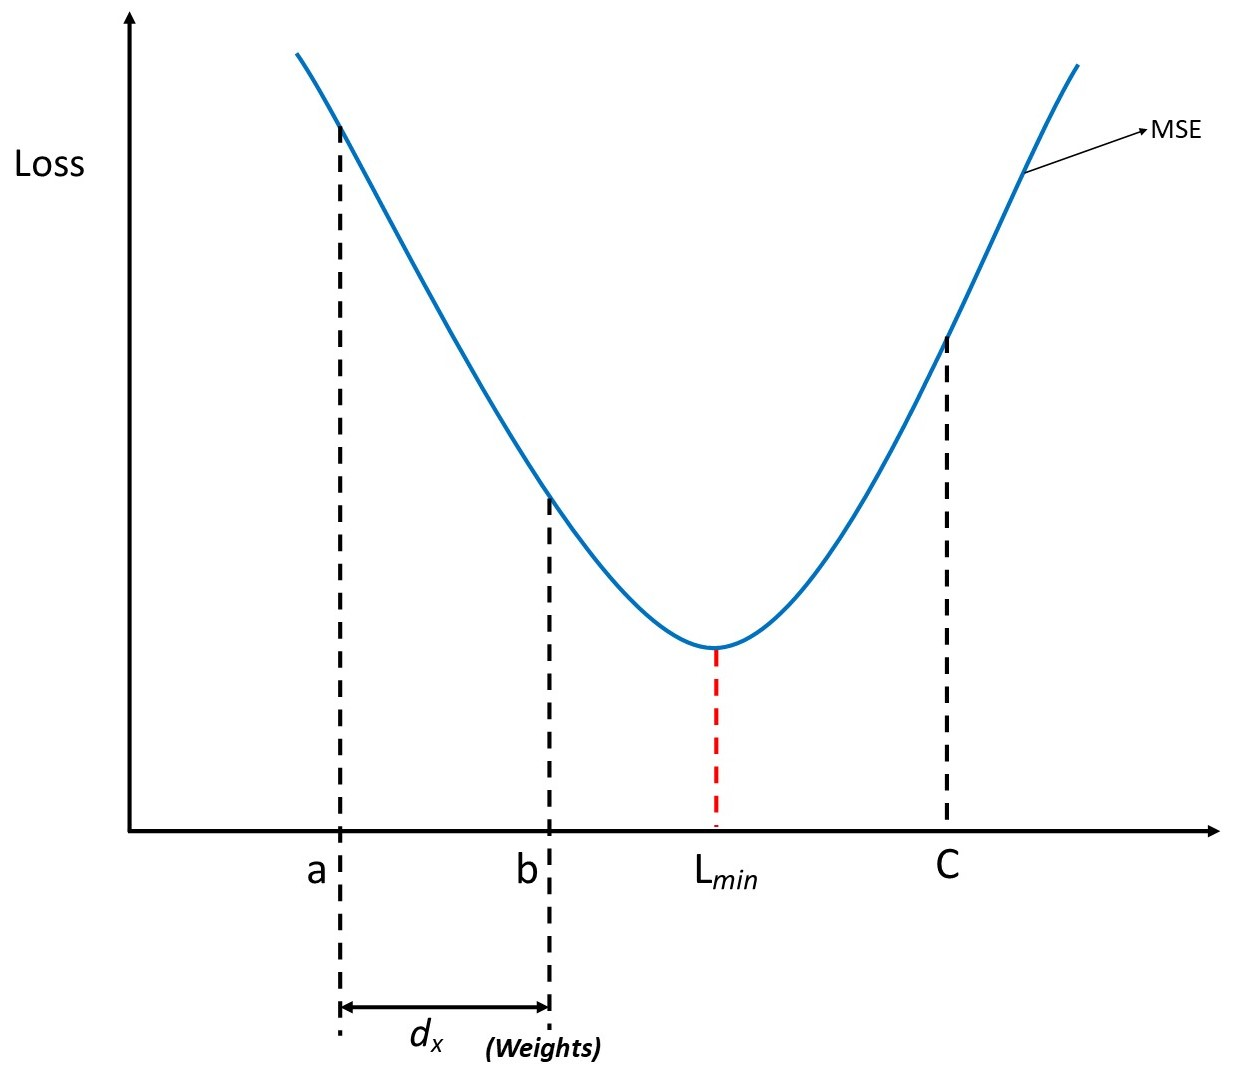


Say, if the loss increases with an increase in weight so Gradient will be positive, So we are basically at the point C, where we can see this statement is true. 

If loss decreases with an increase in weight so gradient will be negative. We can see point A, corresponds to such a situation. 

Now, from point A we need to move towards positive x-axis and the gradient is negative. 

From point C, we need to move towards negative x — axis but the gradient is positive. 

So, always the negative of the Gradient shows the directions along which the weights should be moved in order to optimize the loss function. So, this way the gradient guides the model whether to increase or decrease weights in order to optimize the loss function. 

The model found which way atmove, now the model needs to find by how much it should move the weights. This is decided by a parameter called Learning Rate denoted by **$Alpha.$**

In the diagram we see, the weights are moved from point A to point B which are at a distance of dx. 

**$dx = alpha * |dEldw|$**

So, the distance to move is the product of learning rate parameter alpha and the magnitude of change in error with a change in weight at that point. 

Now, we need to decide the Learning Rate very carefully. If it is very large the values of weights will be changed with a great amount and it would overstep the optimal value. If it is very low it takes tiny steps and takes a lot of steps to optimize. The updated weights are changed according to the following formula. 

**$w = w — alpha * |dEldw|$**

where w is the previous weight. 

With each epoch, the model moves the weights according to the gradient to find the best weights. Now, this is a loss optimization for a particular example in our training dataset. Our dataset contains thousands of such examples, so it will take a huge time to find optimal weights for all.

Experiments have shown that if we optimize on only one sample of our training set, the weigh optimization is good enough for the whole dataset.

So, depending upon the methods we have different types of gradient descent mechanisims. 

* **Stochastic Gradient Descent**: When we train the model to optimize the loss function using only one particular example form our dataset, it is called Stochastic Gradient Descent
* **Batch Gradient Descent**: When we train the model to optimize the loss function using the mean of all the individual losses in our whole dataset, it is classed Batch Grdient Desent
* **Mini-Batch Gradient Desecnt**: Now, as we discussed batch gradient descent takes a lot of time and is therefore somewhat inefficient. if we look at SGD, it is trained using only 1 example. So, how good do you think a baby will learn if it is shown only one bike and told to learn about all other bikes? It's simple its decision will be somewhat biased to the peculiarities of the shown example. So, it is the same for the SGD, there is a possibility that the model may get too biased with the peculiarity of that particular example. So, we use the mean of a batch of 10-1000 examples to check the optimize the loss in order to deal with the problems.

###Backpropagation 

The minimum of the loss function of the neural network is not very easy to locate because it is not an easy function like the one we saw for MSE.

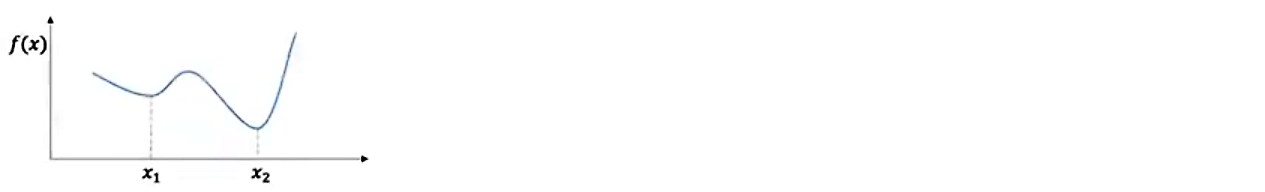

Now, as we see in the graph the loss function may look something like this. As we can see it has two minima, a local one and a global one. So, if we somehow end up in he local one we will end up in a suboptimal state. So, here the point where the weights initialize matter. For example, if the weights initialize to somewhere near $x1$ and there is a high chance we will get stuck at the local minima, which is not the same with normal MSE.


###Optimizers

Now we have seen that loss function has various local minima which can misguide our model. We can prevent this from happening if we can monito and fix the learning rate properly

Now, manually doing this is not possible, optimizers does this for us. It optimizes the learning rate automatically to prevent the model from entering a local minimum and is also responsible for fastening the optimization process.

**Most used optimizers are**
* Adam
* Adagrad
* RMSProp
* SGD

Adam is the most commonly used optimizer

##Scratch Neural Network

NOTE: Problem 1 to 5 will be focusing on the following 
* Codes that determines the initial weight vlue of each layer of the neural network
* IMplementation of forward propagation
* Implementation of cross entropy error
* Implementation of backpropagation

**MNIST** - This is a standard dataset for image classification and handwritten number recognition. This dataset contains 60,000 training and 10,000 test 28×28 pixel black and white images, and labels for which numbers are form 0 to 9.

#**Deep Neural Netwok**
For Deep Neural Networks, we would be focusing on the following:
* More number of layers
* We will abso be able to deal with more advance functions, activation functions, initial values and optimization methods
* Brief background of the next coming frameworks





#[Problem 1] Classifying fully connected layers

Fot this problem, the following modifications will be made
* Number of layers
* Layer type (other types of layers such as convolutional layer will appear in the future)
* Types of activation functions
* Optimization method


**The given sample codes (Sample codes 1, 2 and 3)**
The idea is to create an instance of the fully connected layer and activation function as in sample code 1, and use it as in sample code 2 and 3. Each class will be explained later



* **Sample code 1**: In the fit method of Sctatch DeepNeuralNetworkClassifier

In [ ]:
# self.sigma : Standard deviation of Gaussian distribution
# self.lr: Learning rate
# self.n_nodes1: Number of nodes in the first layer
# self.n_nodes2: Number of nodes in the second layer
# self.n_output: Number of nodes in the output layer

optimizer = SGD(self.lr)
self.FC1 = FC(self.n_features, self.n_nodes1, SimpleInitializer(self.sigma), optimizer)
self.activation1 = Tanh()
self.FC2 = FC(self.n_nodes1, self.n_nodes2, SimpleInitializer(self.sigma), optimizer)
self.activation2 = Tanh()
self.FC3 = FC(self.n_nodes2, self.n_output, SimpleInitializer(self.sigma), optimizer)
self.activation3 = Softmax()


* **Sample code 2:** Forward for each iteration

In [ ]:
A1 = self.FC1.forward(X)
Z1 = self.activation1.forward(A1)
A2 = self.FC2.forward(Z1)
Z2 = self.activation2.forward(A2)
A3 = self.FC3.forward(Z2)
Z3 = self.activation3.forward(A3)

* **Sample code 3:** B ackward for each iteration

In [ ]:
dA3 = self.activation3.backward(Z3, Y) # The cross entropy error and softmax are matched.
dZ2 = self.FC3.backward(dA3)
dA2 = self.activation2.backward(dZ2)
dZ1 = self.FC2.backward(dA2)
dA1 = self.activation1.backward(dZ1)
dZ0 = self.FC1.backward(dA1) # dZ0 is not used

**Template of the Fully Connected Layers Class**

In [ ]:
class FC:
    """
    Number of nodes Fully connected layer from n_nodes1 to n_nodes2
    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in the later layer
    initializer: instance of initialization method
    optimizer: instance of optimization method
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # Initialize
        # Initialize self.W and self.B using the initializer method
        pass
    def forward(self, X):
        """
        forward
        Parameters
        ----------
        X : The following forms of ndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : The following forms of ndarray, shape (batch_size, n_nodes2)
            output
        """        
        pass
        return A
    def backward(self, dA):
        """
        Backward
        Parameters
        ----------
        dA : The following forms of ndarray, shape (batch_size, n_nodes2)
            Gradient flowing from behind
        Returns
        ----------
        dZ : The following forms of ndarray, shape (batch_size, n_nodes1)
            Gradient to flow forward
        """
        pass
        # update
        self = self.optimizer.update(self)
        return dZ

**Implementation**

In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
class FC:
    
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.W = initializer.W(self.n_nodes1, self.n_nodes2)
        self.B = initializer.B(self.n_nodes2)
        self.optimizer = optimizer
        self.HW = 0
        self.HB = 0
        
    def forward(self, X):
        self.Z = X
        self.A = X @ self.W + self.B
        return self.A
    
    def backward(self, dA):
        self.dB = np.sum(dA, axis=0)
        self.dW = self.Z.T @ dA
        self.dZ = dA @ self.W.T
        self = self.optimizer.update(self)
        return self.dZ

#[Problem 2] Classifying the initialization method
The idea is to be able to pass an instance of the initialization method to the constructor of the fully connected layer. The following template is given

**Template for Classifying the initialization method**

In [ ]:
class SimpleInitializer:
    """
    Simple initialization with Gaussian distribution
    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution
    """
    def __init__(self, sigma):
        self.sigma = sigma
    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer
        Returns
        ----------
        W :
        """
        pass
        return W
    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer
        Returns
        ----------
        B :
        """
        pass
        return B

**Implementation**

In [ ]:
class SimpleInitializer:

    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B

#[Problem 3] Classifying optimization methods
Please classify the optimization method.

With respect to the optimization method, it is passed as an instance to the fully connected layer as well as the initialization method. When backward, we can update it as self.optimizer.update(self).



**Template for Classifying the optimization method**

In [ ]:
class SGD:
    """
    Stochastic gradient descent
    Parameters
    ----------
    lr : Learning rate
    """
    def __init__(self, lr):
        self.lr = lr
    def update(self, layer):
        """
        Update weights and biases for a layer
        Parameters
        ----------
        layer : Instance of the layer before update
        """

**Implementation**

In [ ]:
class SGD:
    
    def __init__(self, lr):
        self.lr = lr
        
    def update(self, layer):
        layer.W -= self.lr * layer.dW / len(layer.Z)
        layer.B -= self.lr * layer.dB / len(layer.Z)
        return layer

The optimization methods we have dealt with so far are created as SGD class (Stochastic Gradient Descent) Please <a id='https://ruder.io/optimizing-gradient-descent/'>check here</a> for more 

#[Problem 4] Classifying activation functions
Please classify the activation function.

The backpropagation of the softmax function is simplified by implementing it including the calculation of the cross entropy error.

**Implementation**

Now let's implement **sigmoid, tanh** and **softmax**

In [ ]:
class Sigmoid:

    def forward(self, A):
        self.A = A
        Z = 1 / (1 + np.exp(-self.A))
        return Z
    
    def backward(self, dZ):
        dA = dZ * ((1 / (1 + np.exp(-self.A))) - (1 / (1 + np.exp(-self.A)))**2)
        return dA

In [ ]:
class Tanh:

    def forward(self, A):
        self.A = A
        Z = np.tanh(self.A)
        return Z
    
    def backward(self, dZ):
        dA = dZ * (1 - np.tanh(self.A)**2)
        return dA

In [ ]:
class softmax:

    def forward(self, A): 
        Z = np.exp(A) / np.sum(np.exp(A), axis=1).reshape(-1, 1)
        return Z
        
    def backward(self, Z, y):
        dA = Z - y
        loss = - np.sum(y * np.log(Z)) / len(y)
        return dA, loss

#[Problem 5] ReLU class creation

Please implement ReLU (Rectified Linear Unit) which is a commonly used activation function as ReLU class.


ReLU is the following formula.

$[Math Processing Error]$

$x$ : Some feature. Scalar


In practice, it is possible to usenp.maximumto sum over arrays.


numpy.maximum — NumPy v1.15 Manual


On the other hand, the derivative of $f(x)$ with respect to $x$ for back propagation is as follows


$[Math Processing Error]$

Mathematically, it is not differentiable, but we can deal with it by setting $0$ for $x=0$.


It means that the positive or negative value of $x$ at the forward time determines whether the gradient is back propagated or not.

**Implementation**

Now let's implement ReLU (Rectified Linear Unit) which is a commonly used activation function as ReLU class.

$f(x)=ReLU(x)={x if x>0, if x≤0.$

$x$ : Some feature. Scalar

In practice, it is possible to usenp.maximumto sum over arrays.
 
On the other hand, the derivative of $f(x)$ with respect to $x$ for back propagation is as follows:

$∂f(x) \frac ∂x = {1 if x > 0, 0 if x ≤ 0.$

In [ ]:
class ReLU:

    def forward(self, A):
        self.A = A
        Z = np.maximum(0, A)
        return Z
    
    def backward(self, dZ):
        dA = dZ * np.where(self.A > 0, 1, 0)
        return dA

Mathematically, it is not differentiable, but we can deal with it by setting $0$ for $x=0$.


It means that the positive or negative value of $x$ at the forward time determines whether the gradient is back propagated or not.

#[Problem 6] Initial value of weight
So far, the initial values of weights and bias have been simply Gaussian distributions, and standard deviation has been treated as a hyperparameter. However, it is known what value it should be. For sigmoidal and hyperbolic tangent functions, the initial value of Xavier (or the initial value of Glorot) is used, and for ReLU the initial value of He.

Create XavierI nitializer class and HeIn itializer class.

* Initial value of Xavier

The standard deviation $\sigma$ at the initial value of Xavier can be obtained by the following equation

$σ = \frac 1{√n}$

$n$ : number of nodes in the previous layer

PLease read this 
<a id='https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf'>$Article$</a>

* Initial value of He

The standard deviation $\sigma$ at He's initial value can be obtained by the following equation

$σ = √ \frac  2n$

$n$ : number of nodes in the previous layer

Please read this <a id='https://arxiv.org/pdf/1502.01852.pdf'>$Article$</a>



**Implementation**


In [ ]:
class XavierInitializer:
    
    def __init__(self, sigma):
        _ = sigma
        
    def W(self, n_nodes1, n_nodes2):
        self.sigma = 1 / np.sqrt(n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
        
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B

In [ ]:
class HeInitializer:

    def __init__(self, sigma):
        _ = sigma
        
    def W(self, n_nodes1, n_nodes2):
        self.sigma = np.sqrt(2 / n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B

#[Problem 7] Optimization method

The most common method is to vary the learning rate in the learning process. Please create a class of AdaGrad which is the basic method.


First, check the SGD you have been using so far.


W
​ ​
′
​ ​
i
​ ​
=
​ ​
W
​ ​
i
​ ​
−
​ ​
α
​ ​
∂
​ ​
L
​ ​
∂
​ ​
W
​ ​
i
​ ​
B
​ ​
′
​ ​
i
​ ​
=
​ ​
B
​ ​
i
​ ​
−
​ ​
α
​ ​
∂
​ ​
L
​ ​
∂
​ ​
B
​ ​
i

$\alpha$ : Learning rate (can be different for each layer, but basically all the same)）


$\frac{\partial L}{\partial W_i}$ : Gradient of loss $L$ with respect to $W_i$.


$\frac{\partial L}{\partial B_i}$ : Gradient of loss $L$ with respect to $B_i$.


Next is AdaGrad. The bias formula is omitted, but it does something similar to weighting.


Gradually reduce the learning rate for that weight as it is updated. Save the sum of the squares of the gradients $H$ for each iteration, and reduce the learning rate by that amount.

.


The learning rate will be different for each weight.


H
​ ​
′
​ ​
i
​ ​
=
​ ​
H
​ ​
i
​ ​
+
​ ​
∂
​ ​
L
​ ​
∂
​ ​
W
​ ​
i
​ ​
⊙
​ ​
∂
​ ​
L
​ ​
∂
​ ​
W
​ ​
i
​ ​
W
​ ​
′
​ ​
i
​ ​
=
​ ​
W
​ ​
i
​ ​
−
​ ​
α
​ ​
(
1
​ ​
√
​ ​
H
​ ​
′
​ ​
i
​ ​
⊙
​ ​
∂
​ ​
L
​ ​
∂
​ ​
W
​ ​
i
)

$H_i$ : sum of squares of gradients up to the previous iteration for the i-th layer (initial value is 0)


$H_i^{\prime}$ : updated $H_i$.

Please read this <a id='http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf'>$Article$</a>

**Implementation**

In [ ]:
class AdaGrad:

    def __init__(self, lr):
        self.lr = lr 
    
    def update(self, layer):
        layer.HW += layer.dW * layer.dW
        layer.HB += layer.dB * layer.dB
        delta = 1e-7 
        layer.W -= self.lr * layer.dW / (np.sqrt(layer.HW) + delta) / len(layer.Z)
        layer.B -= self.lr * layer.dB / (np.sqrt(layer.HB) + delta) / len(layer.Z)
        return layer

#[Problem 8] Class completion
Complete the Scratch Deep Neural Netrowk Classifier class that can be trained and estimated with any configuration.

**Implementation**

Now let's complete the Scratch Deep Neural Network Classifier class that can be trained and estimated with any configuration.

In [ ]:
class GetMiniBatch:

    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        
    def __len__(self):
        return self._stop
    
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1] 
    
    def __iter__(self):
        self._counter = 0
        return self
    
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [ ]:
class ScratchDeepNeuralNetrowkClassifier():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU):
        self.verbose = verbose
        self.batch_size = 20  
        self.n_features = 784 
        self.n_nodes1 = 400 
        self.n_nodes2 = 200 
        self.n_output = 10 
        self.sigma = 0.02 
        self.lr = 0.5 
        self.epoch = epoch 
        self.optimizer = optimizer 
        self.initializer = initializer 
        self.activater = activater 
    
    def fit(self, X, y, X_val=None, y_val=None):
        
        #Preparing a list where we will be recording the loss on the train and the loss on the test set
        self.loss_train = [] 
        self.loss_val = [] 
        
        #Preparing the Fully Connected Layers (3) using the FC class defined previously.
        optimizer = self.optimizer(self.lr)
        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), optimizer)
        self.activation1 = self.activater()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), optimizer)
        self.activation2 = self.activater()
        self.FC3 = FC(self.n_nodes2, self.n_output, self.initializer(self.sigma), optimizer)
        self.activation3 = softmax()
        
        #Going through the number of epochs, doing forward and back propagations and recording the loss.
        for i in range(self.epoch):
            #Instantiation of the GetMiniBatch class
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=i)
            for mini_X, mini_y in get_mini_batch:
                A1 = self.FC1.forward(mini_X)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                #print(Z2.shape)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
                dA3, loss = self.activation3.backward(Z3, mini_y) 
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1) 

            if self.verbose:
                A1 = self.FC1.forward(X)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)   
                #Recording the loss on the train set
                self.loss_train.append(self.activation3.backward(Z3, y)[1])
                
                if X_val is not None:
                    A1 = self.FC1.forward(X_val)
                    Z1 = self.activation1.forward(A1)
                    A2 = self.FC2.forward(Z1)
                    Z2 = self.activation2.forward(A2)
                    A3 = self.FC3.forward(Z2)
                    Z3 = self.activation3.forward(A3)   
                    #Recording the loss on the validation set
                    self.loss_val.append(self.activation3.backward(Z3, y_val)[1])
    
    #Doing predictions. Using np.argmax() in order to get the indice of the highest value 
    def predict(self, X):
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        return np.argmax(Z3, axis=1)

#[Problem 9] Learning and estimation
Create several networks with varying numbers of layers and activation functions. Then, train and estimate the MNIST data and calculate the Accuracy.

**Implementation**
NOw let's create several networks with varying numbers of layers and activation functions. Then, train and estimate the MNIST data and calculate the accuracy.

In [ ]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_val[:, np.newaxis])

In [ ]:
SDNN = ScratchDeepNeuralNetrowkClassifier(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activater=ReLU) 

SDNN.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)

In [ ]:
pred = SDNN.predict(X_val)
accuracy_score(y_val, pred)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(1, SDNN.epoch+1)), SDNN.loss_train, label='train')
plt.plot(list(range(1, SDNN.epoch+1)), SDNN.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN.epoch+1)));

* **Let's check the accuracy with other layers. We have tested with three layers, let's check for 4 and 6 layers.**

In [ ]:
class ScratchDeepNeuralNetrowkClassifier_4():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU):
        self.verbose = verbose
        self.batch_size = 20 
        self.n_features = 784 
        self.n_nodes1 = 400 
        self.n_nodes2 = 200 
        self.n_nodes3 = 150 
        self.n_output = 10 
        self.sigma = 0.02 
        self.lr = 0.5 
        self.epoch = epoch 
        self.optimizer = optimizer 
        self.initializer = initializer 
        self.activater = activater 
    
    def fit(self, X, y, X_val=None, y_val=None):
        
        #Preparing a list where we will be recording the loss on the train and the loss on the test set
        self.loss_train = [] 
        self.loss_val = []
        #The optimizer and the learning rate will be the one we pass in while doing instantiation 
        #of the Scratch Class
        optimizer = self.optimizer(self.lr) 
        
        #Preparing the Fully Connected Layers (4) using the FC class defined previously.
        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), optimizer)
        self.activation1 = self.activater()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), optimizer)
        self.activation2 = self.activater()
        self.FC3 = FC(self.n_nodes2, self.n_nodes3, self.initializer(self.sigma), optimizer)
        self.activation3 = self.activater()
        self.FC4 = FC(self.n_nodes3, self.n_output, self.initializer(self.sigma), optimizer)
        self.activation4 = softmax()
        
        #Going through the number of epochs, doing forward and back propagations and recording the loss.
        for i in range(self.epoch):
            #Instantiation of the GetMiniBatch class
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=i)
            for mini_X, mini_y in get_mini_batch:
                self.forward(mini_X)
                self.backward(mini_y)
            
            if self.verbose:
                self.forward(X)
                self.loss_train.append(self.activation4.backward(self.Z4, y)[1])
                
                if X_val is not None:
                    self.forward(X_val)
                    self.loss_val.append(self.activation4.backward(self.Z4, y_val)[1])
    
    def forward(self, X):
        
        #Forward Propagation
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        A4 = self.FC4.forward(Z3)
        self.Z4 = self.activation4.forward(A4)
        
    def backward(self, y):
        
        #Back Propagation
        dA4, self.loss = self.activation4.backward(self.Z4, y) 
        dZ3 = self.FC4.backward(dA4)
        dA3 = self.activation3.backward(dZ3)
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dZ0 = self.FC1.backward(dA1) 
        
    #Doing predictions. Using np.argmax() in order to get the indice of the highest value     
    def predict(self, X):
        self.forward(X)
        return np.argmax(self.Z4, axis=1) 

In [ ]:
SDNN4 = ScratchDeepNeuralNetrowkClassifier_4(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activater=ReLU)
SDNN4.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)

pred = SDNN4.predict(X_val)
accuracy_score(y_val, pred)

In [ ]:
plt.plot(list(range(1, SDNN4.epoch+1)), SDNN4.loss_train, label='train')
plt.plot(list(range(1, SDNN4.epoch+1)), SDNN4.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN4.epoch+1)));

In [ ]:
class ScratchDeepNeuralNetrowkClassifier_6():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU):
        self.verbose = verbose
        self.batch_size = 20 
        self.n_features = 784 
        self.n_nodes1 = 400 
        self.n_nodes2 = 200 
        self.n_nodes3 = 150 
        self.n_nodes4 = 100 
        self.n_nodes5 = 50 
        self.n_output = 10 
        self.sigma = 0.02 
        self.lr = 0.5 
        self.epoch = epoch 
        self.optimizer = optimizer 
        self.initializer = initializer 
        self.activater = activater 
    
    def fit(self, X, y, X_val=None, y_val=None):
        
        #Preparing a list where we will be recording the loss on the train and the loss on the test set
        self.loss_train = [] 
        self.loss_val = []
        #The optimizer and the learning rate will be the one we pass in while doing instantiation 
        #of the Scratch Class
        optimizer = self.optimizer(self.lr)

        #Preparing the Fully Connected Layers (6) using the FC class defined previously.
        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), optimizer)
        self.activation1 = self.activater()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), optimizer)
        self.activation2 = self.activater()
        self.FC3 = FC(self.n_nodes2, self.n_nodes3, self.initializer(self.sigma), optimizer)
        self.activation3 = self.activater()
        self.FC4 = FC(self.n_nodes3, self.n_nodes4, self.initializer(self.sigma), optimizer)
        self.activation4 = self.activater()
        self.FC5 = FC(self.n_nodes4, self.n_nodes5, self.initializer(self.sigma), optimizer)
        self.activation5 = self.activater()
        self.FC6 = FC(self.n_nodes5, self.n_output, self.initializer(self.sigma), optimizer)
        self.activation6 = softmax()
                
        #Going through the number of epochs, doing forward and back propagations and recording the loss.
        for i in range(self.epoch):
            #Instantiation of the GetMiniBatch class
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=i)
            for mini_X, mini_y in get_mini_batch:
                self.forward(mini_X)
                self.backward(mini_y)
            
            if self.verbose:
                self.forward(X)
                self.loss_train.append(self.activation6.backward(self.Z6, y)[1])
                
                if X_val is not None:
                    self.forward(X_val)
                    self.loss_val.append(self.activation6.backward(self.Z6, y_val)[1])
    
    def forward(self, X):
        
        #Forward Propagation
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        A4 = self.FC4.forward(Z3)
        Z4 = self.activation4.forward(A4)
        A5 = self.FC5.forward(Z4)
        Z5 = self.activation5.forward(A5)
        A6 = self.FC6.forward(Z5)
        self.Z6 = self.activation6.forward(A6)
        
    def backward(self, y):
        #Back Propagation
        dA6, self.loss = self.activation6.backward(self.Z6, y) 
        dZ5 = self.FC6.backward(dA6)
        dA5 = self.activation5.backward(dZ5)
        dZ4 = self.FC5.backward(dA5)
        dA4 = self.activation4.backward(dZ4)
        dZ3 = self.FC4.backward(dA4)
        dA3 = self.activation3.backward(dZ3)
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dZ0 = self.FC1.backward(dA1) 
        
    #Doing predictions. Using np.argmax() in order to get the indice of the highest value    
    def predict(self, X):
        self.forward(X)
        return np.argmax(self.Z6, axis=1)  

In [ ]:
SDNN6 = ScratchDeepNeuralNetrowkClassifier_6(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activater=ReLU)
SDNN6.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)

pred = SDNN6.predict(X_val)
accuracy_score(y_val, pred)

In [ ]:
plt.plot(list(range(1, SDNN6.epoch+1)), SDNN6.loss_train, label='train')
plt.plot(list(range(1, SDNN6.epoch+1)), SDNN6.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN6.epoch+1)));

## **Conclusion**

We can now say that the accuracy was at its best when we had three layers.

* Let's finally generalize the ScratchDeepNeuralNetrowkClassifier and make it possible to input layers with the number of nodes.

In [ ]:
class General_ScratchDeepNeuralNetrowkClassifier():

    def __init__(self, verbose=False, epoch=1, optimizer=SGD, initializer=HeInitializer, activater=ReLU, n_nodes=None):
        self.verbose = verbose
        self.batch_size = 20 
        self.sigma = 0.02
        self.lr = 0.5 
        self.epoch = epoch 
        self.optimizer = optimizer 
        self.initializer = initializer 
        self.activater = activater 
        self.n_nodes = n_nodes 
    
    def fit(self, X, y, X_val=None, y_val=None):
        
        #Preparing a list where we will be recording the loss on the train and the loss on the test set
        self.loss_train = [] 
        self.loss_val = []
        #The optimizer and the learning rate will be the one we pass in while doing instantiation 
        #of the Scratch Class
        optimizer = self.optimizer(self.lr)
        #creating list since we want the Class to be ready for any number of Fully Connected Layer along with their activater
        self.fcs = [] 
        self.act = [] 
        
        #Preparing the Fully Connected Layers (n) using the FC class defined previously.
        for i in range(len(self.n_nodes)-2):
            self.fcs.append(FC(self.n_nodes[i], self.n_nodes[i+1], self.initializer(self.sigma), optimizer))
            self.act.append(self.activater())
        self.fcs.append(FC(self.n_nodes[i+1], self.n_nodes[-1], self.initializer(self.sigma), optimizer))
        #Since it is a multiclass classification problem, it is sure that softmax will be used as activation function for the output layer
        self.act.append(softmax()) 
        
        #Going through the number of epochs, doing forward and back propagations and recording the loss.
        for i in range(self.epoch):
            #Instantiation of the GetMiniBatch class
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=i)
            for mini_X, mini_y in get_mini_batch:
                
                #The number A and Z will depend on the number of layers that we pass in so we create lists
                A = []
                Z = []
                 for i, (f, a) in enumerate(zip(self.fcs, self.act)):
                    if i == 0:
                        A.append(f.forward(mini_X))
                        Z.append(a.forward(A[i]))
                    else:
                        A.append(f.forward(Z[i-1]))
                        Z.append(a.forward(A[i]))     
                dA = []
                dZ = []
                for i, (f, a) in enumerate(zip(self.fcs[::-1], self.act[::-1])):
                    if i == 0:
                        dA.append(a.backward(Z[-(i+1)], mini_y)[0])
                        dZ.append(f.backward(dA[i]))
                    else:
                        dA.append(a.backward(dZ[i-1]))
                        dZ.append(f.backward(dA[i]))

            if self.verbose:
                A = []
                Z = []
                for i, (f, a) in enumerate(zip(self.fcs, self.act)):
                    if i == 0:
                        A.append(f.forward(X))
                        Z.append(a.forward(A[i]))
                    else:
                        A.append(f.forward(Z[i-1]))
                        Z.append(a.forward(A[i]))           
                self.loss_train.append(self.act[-1].backward(Z[-1], y)[1])
                
                if X_val is not None:
                    A = []
                    Z = []
                    for i, (f, a) in enumerate(zip(self.fcs, self.act)):
                        if i == 0:
                            A.append(f.forward(X_val))
                            Z.append(a.forward(A[i]))
                        else:
                            A.append(f.forward(Z[i-1]))
                            Z.append(a.forward(A[i]))           
                    self.loss_val.append(self.act[-1].backward(Z[-1], y_val)[1])
    
    #Doing predictions. Using np.argmax() in order to get the indice of the highest value 
    def predict(self, X):
        A = []
        Z = []
        for i, (f, a) in enumerate(zip(self.fcs, self.act)):
            if i == 0:
                A.append(f.forward(X))
                Z.append(a.forward(A[i]))
            else:
                A.append(f.forward(Z[i-1]))
                Z.append(a.forward(A[i]))
        return np.argmax(Z[-1], axis=1)

**Now let's test it with 5 layers**

In [ ]:
node_list = [784, 400, 200, 150, 100, 10]
SDNN5 = General_ScratchDeepNeuralNetrowkClassifier(verbose=True, epoch=10, optimizer=AdaGrad, initializer=HeInitializer, activater=ReLU, n_nodes=node_list)
SDNN5.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)
pred = SDNN5.predict(X_val)
accuracy_score(y_val, pred)

In [ ]:
plt.plot(list(range(1, SDNN5.epoch+1)), SDNN5.loss_train, label='train')
plt.plot(list(range(1, SDNN5.epoch+1)), SDNN5.loss_val, label='test')
plt.legend()
plt.xticks(list(range(1, SDNN5.epoch+1)));

$Prepared by: Sulaiman Bangura$